## Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

1.   market_id : integer id for the market where the restaurant lies
2.   created_at : the timestamp at which the order was placed
3.   actual_delivery_time : the timestamp when the order was delivered
4.   store_primary_category : category for the restaurant
5.   order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
6.   total_items subtotal : final price of the order
7.   num_distinct_items : the number of distinct items in the order
8.   min_item_price : price of the cheapest item in the order
9.  max_item_price : price of the costliest item in order
10.  total_onshift_partners : number of delivery partners on duty at the time order was placed
11. total_busy_partners : number of delivery partners attending to other tasks
12. total_outstanding_orders : total number of orders to be fulfilled at the moment

## Importing the data and data structure analysis

In [1]:
#for reading and handling the data
import pandas as pd
import numpy as np
import os

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Scaler Case studies/Porter Neural Networks Regression/dataset.csv" )

In [5]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [7]:
data.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [8]:
data.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

## Data preprocessing

In [9]:
#Converting the date-time to datatype
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data['created_at'] = pd.to_datetime(data['created_at'])

In [10]:
data['store_primary_category'].value_counts()

american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [11]:
#dropping unncessary columns
data.drop(["store_id"],inplace=True,axis=1)

In [12]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


### Feature engineering

1. Creating the target column time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)
2. Getting hour of day from the order time and also the day of the week
3. Understanding pandas datetime data type and what function it provides by default
4. Get delivery time in minutes

In [13]:
data['time_taken']=data['actual_delivery_time'] - data['created_at']

### Get delivery time in minutes

In [14]:
from datetime import timedelta
data['time_taken_mins']=pd.to_timedelta(data['time_taken'])/pd.Timedelta('60s')

In [15]:
data['time_taken_mins'].value_counts()

41.383333     128
38.000000     119
38.016667     118
38.450000     115
37.716667     115
             ... 
139.916667      1
139.750000      1
107.366667      1
157.383333      1
134.566667      1
Name: time_taken_mins, Length: 7134, dtype: int64

In [16]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.250000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.833333


#### Getting hour of day from the order time and also the day of the week

In [17]:
data['hour']=data['created_at'].dt.hour
data['day']=data['created_at'].dt.dayofweek

In [18]:
data.drop(["actual_delivery_time"],inplace=True,axis=1)
data.drop(["created_at"],inplace=True,axis=1)
data.drop(["time_taken"],inplace=True,axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   store_primary_category    192668 non-null  object 
 2   order_protocol            196433 non-null  float64
 3   total_items               197428 non-null  int64  
 4   subtotal                  197428 non-null  int64  
 5   num_distinct_items        197428 non-null  int64  
 6   min_item_price            197428 non-null  int64  
 7   max_item_price            197428 non-null  int64  
 8   total_onshift_partners    181166 non-null  float64
 9   total_busy_partners       181166 non-null  float64
 10  total_outstanding_orders  181166 non-null  float64
 11  time_taken_mins           197421 non-null  float64
 12  hour                      197428 non-null  int64  
 13  day                       197428 non-null  i

In [20]:
data["order_protocol"].value_counts()

1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [21]:
#data["order_protocol"] = data["order_protocol"].astype("category")

### Handling null values

In [22]:
#using dropna removing columns with null values
data = data.dropna()

In [23]:
data

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,0,1
197424,1.0,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0,4
197425,1.0,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,4,5
197426,1.0,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,18,6


In [24]:
data.isna().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time_taken_mins             0
hour                        0
day                         0
dtype: int64

In [25]:
data.dtypes

market_id                   float64
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
time_taken_mins             float64
hour                          int64
day                           int64
dtype: object

In [26]:
## removing duplicate values if any
data.duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

### Numerical (continuous) variables

In [27]:
def hist_kde_box_plot(df, var:str):
    fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
    sns.histplot(df, x = var, ax=axes[0])
    sns.kdeplot(df, x = var, ax=axes[1])
    sns.boxplot(df, x = var, ax=axes[2])
    plt.tight_layout()
    plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  time_taken_mins           176248 non-null  float64
 12  hour                      176248 non-null  int64  
 13  day                       176248 non-null  i

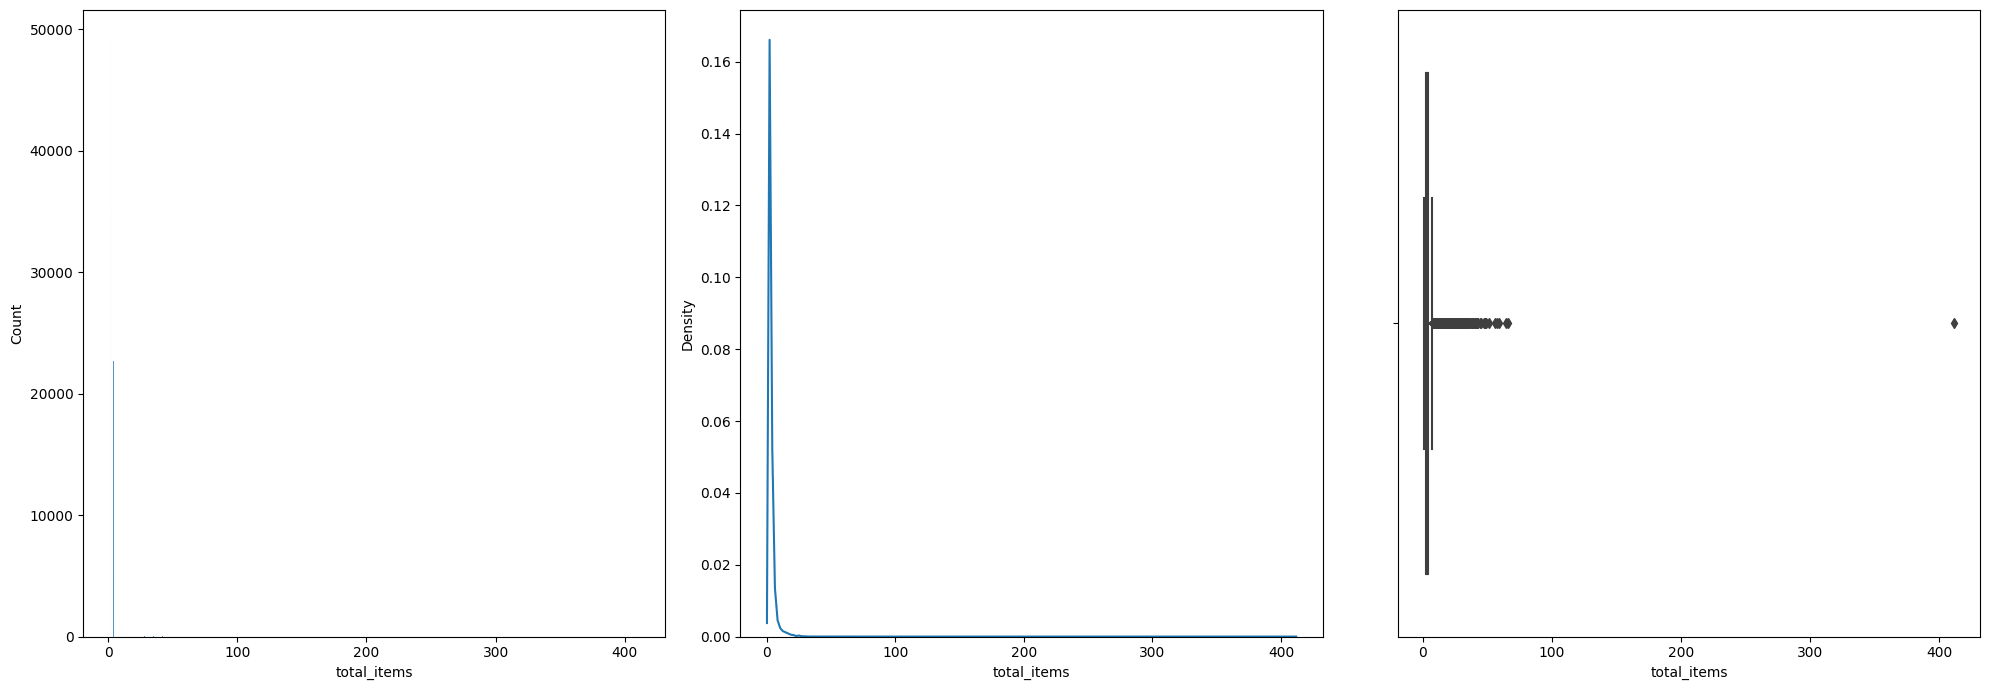

In [29]:
### total_items
hist_kde_box_plot(data, "total_items")

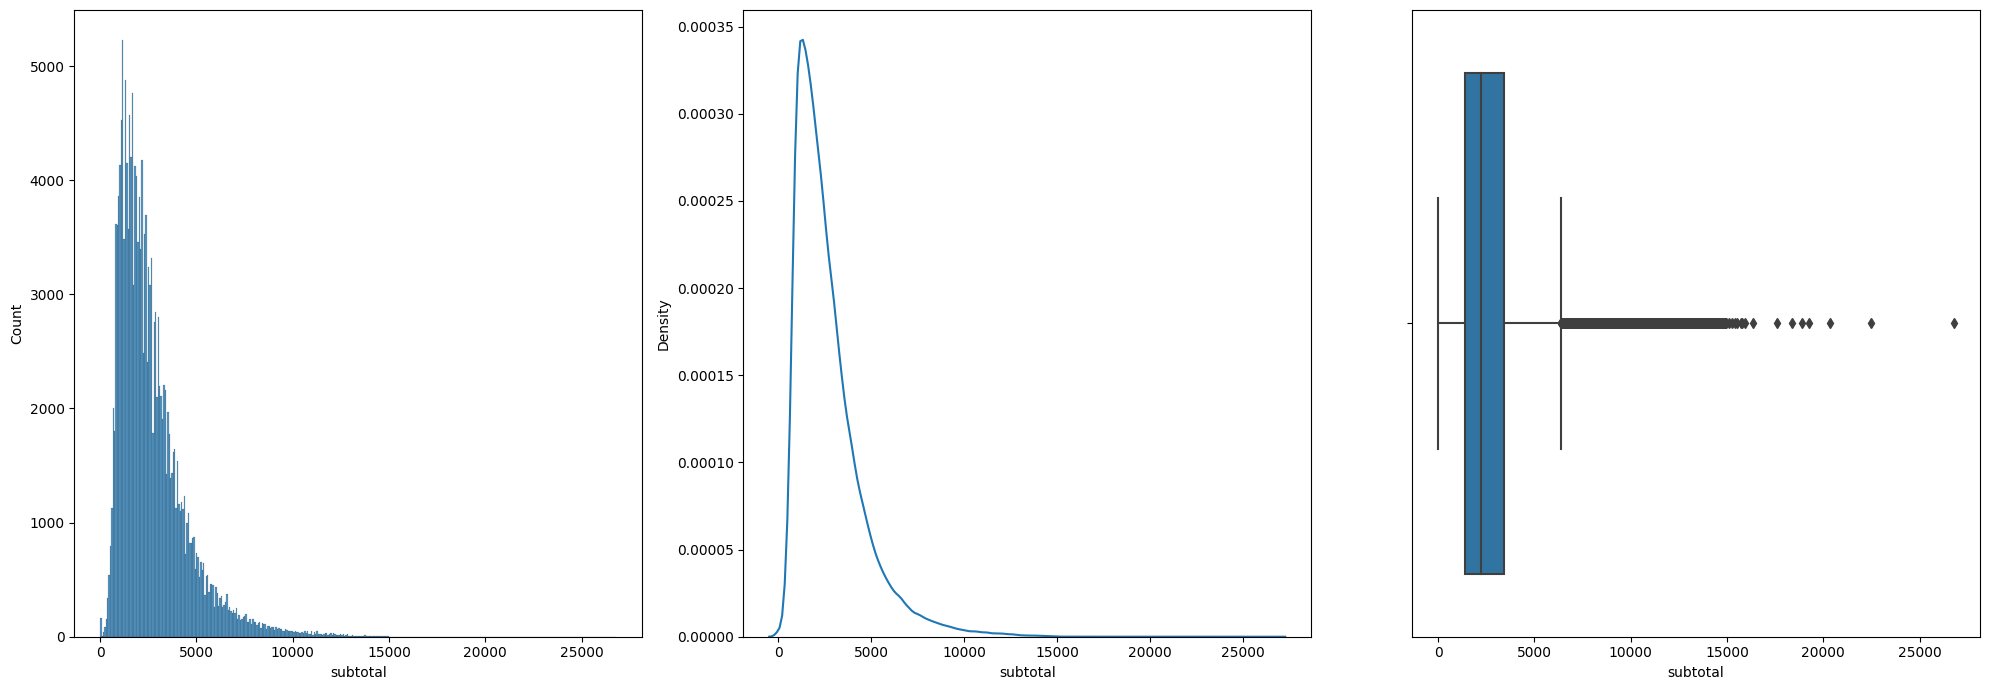

In [ ]:
### subtotal
hist_kde_box_plot(data, "subtotal")

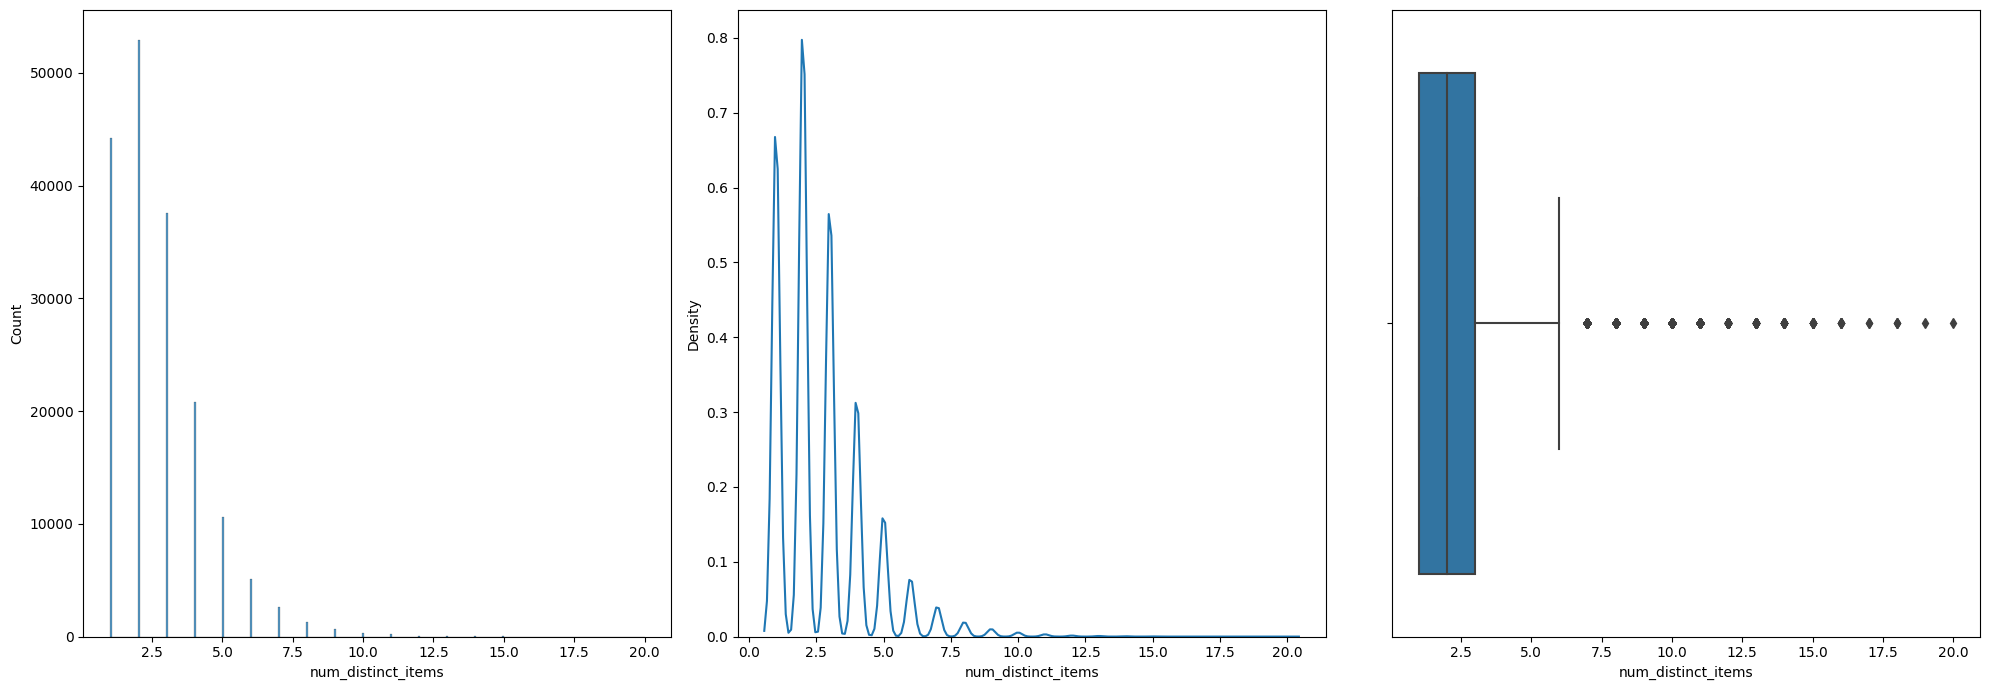

In [ ]:
### num_distinct_items
hist_kde_box_plot(data, "num_distinct_items")

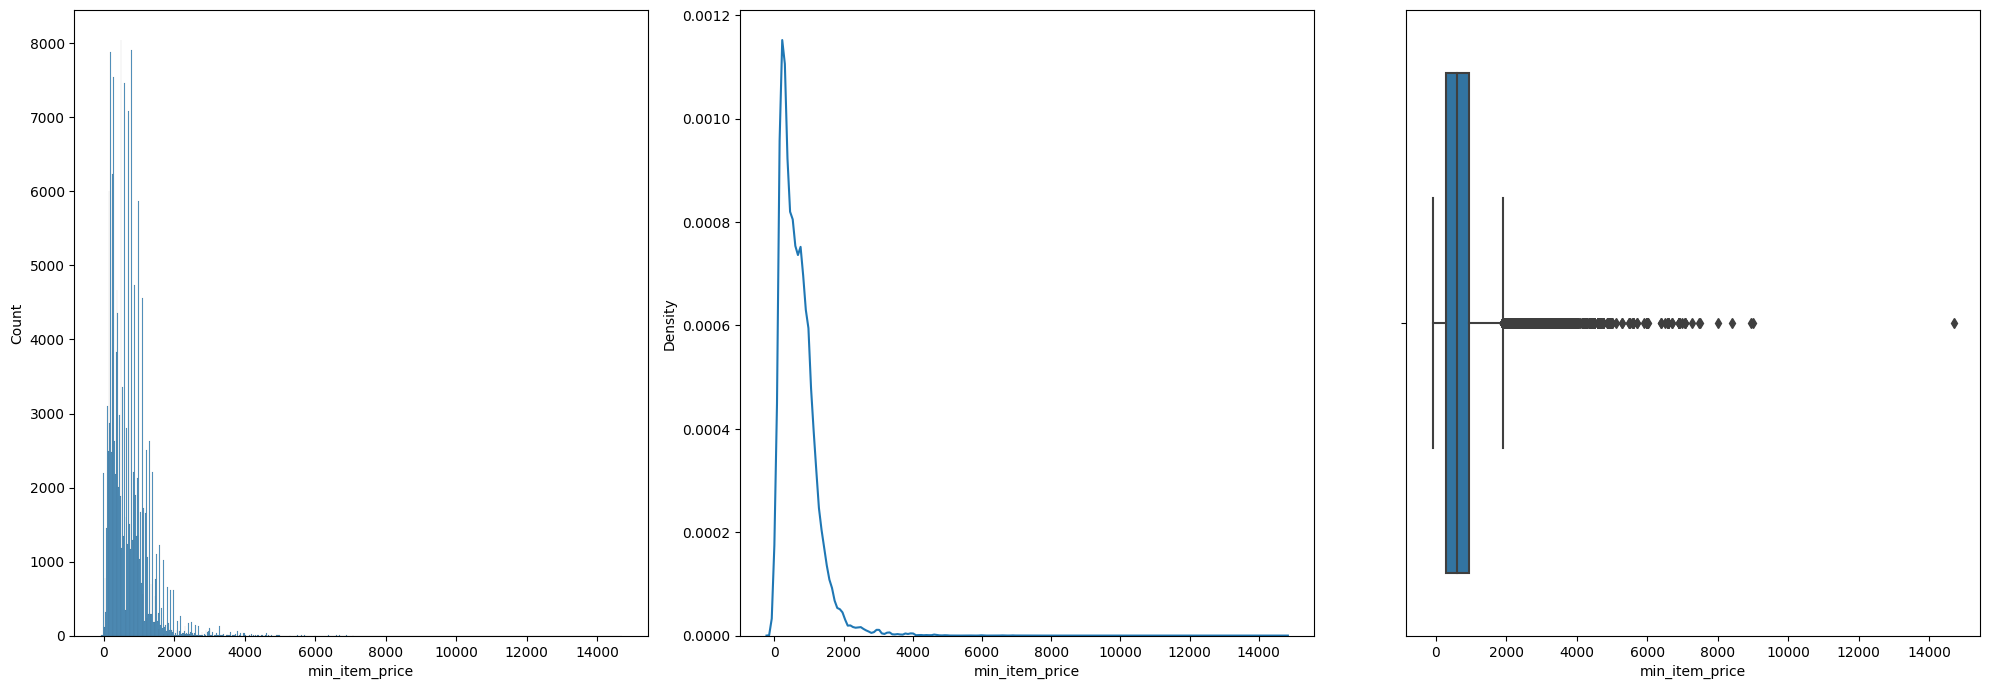

In [ ]:
### min_item_price
hist_kde_box_plot(data, "min_item_price")

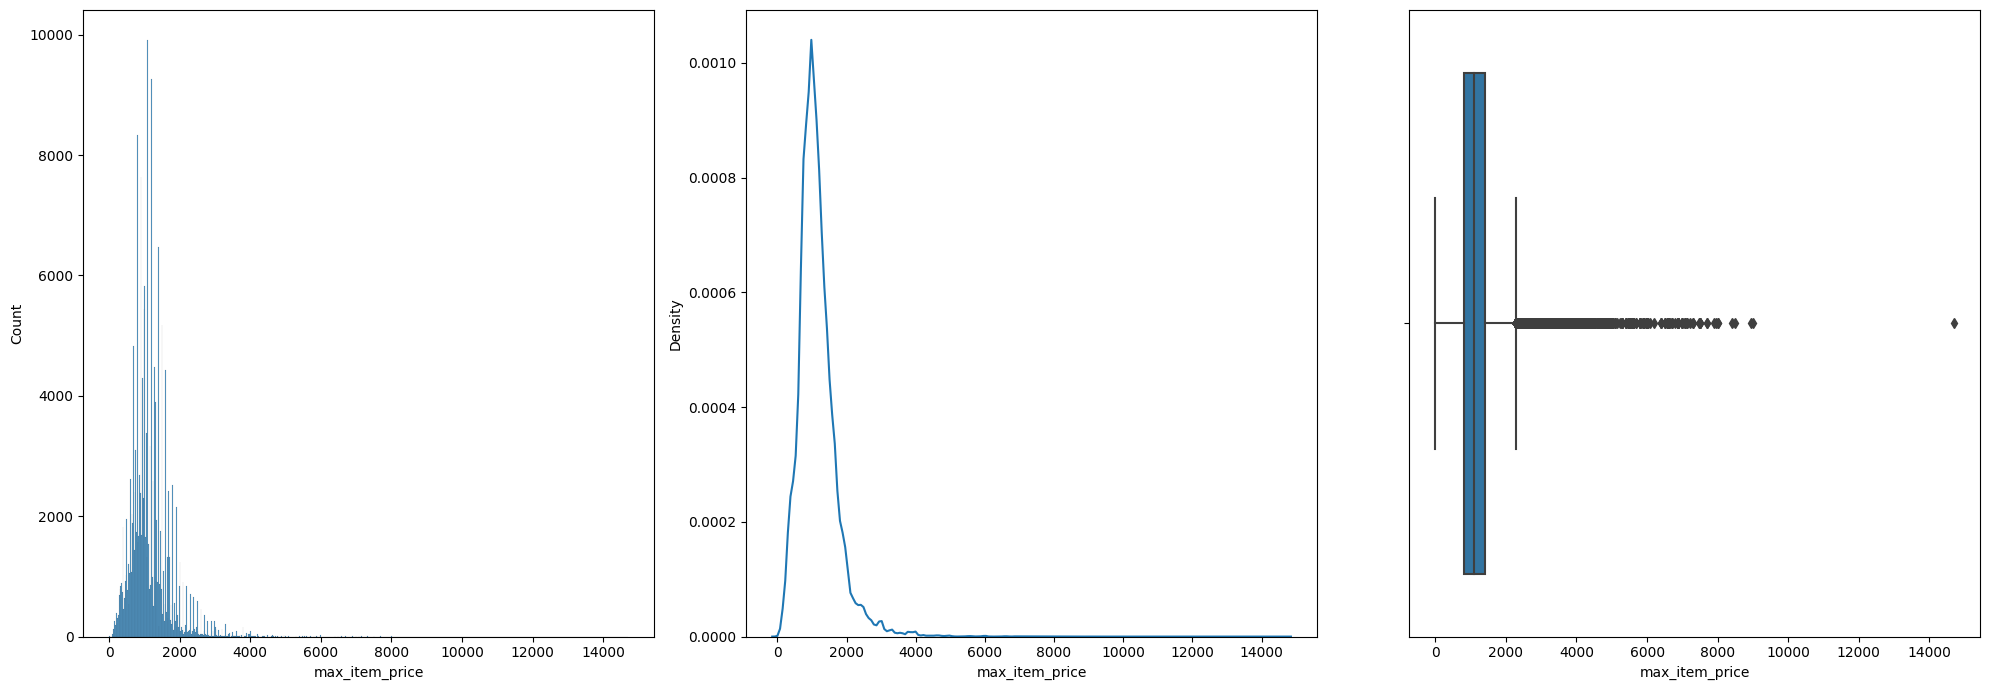

In [ ]:
### max_item_price
hist_kde_box_plot(data, "max_item_price")

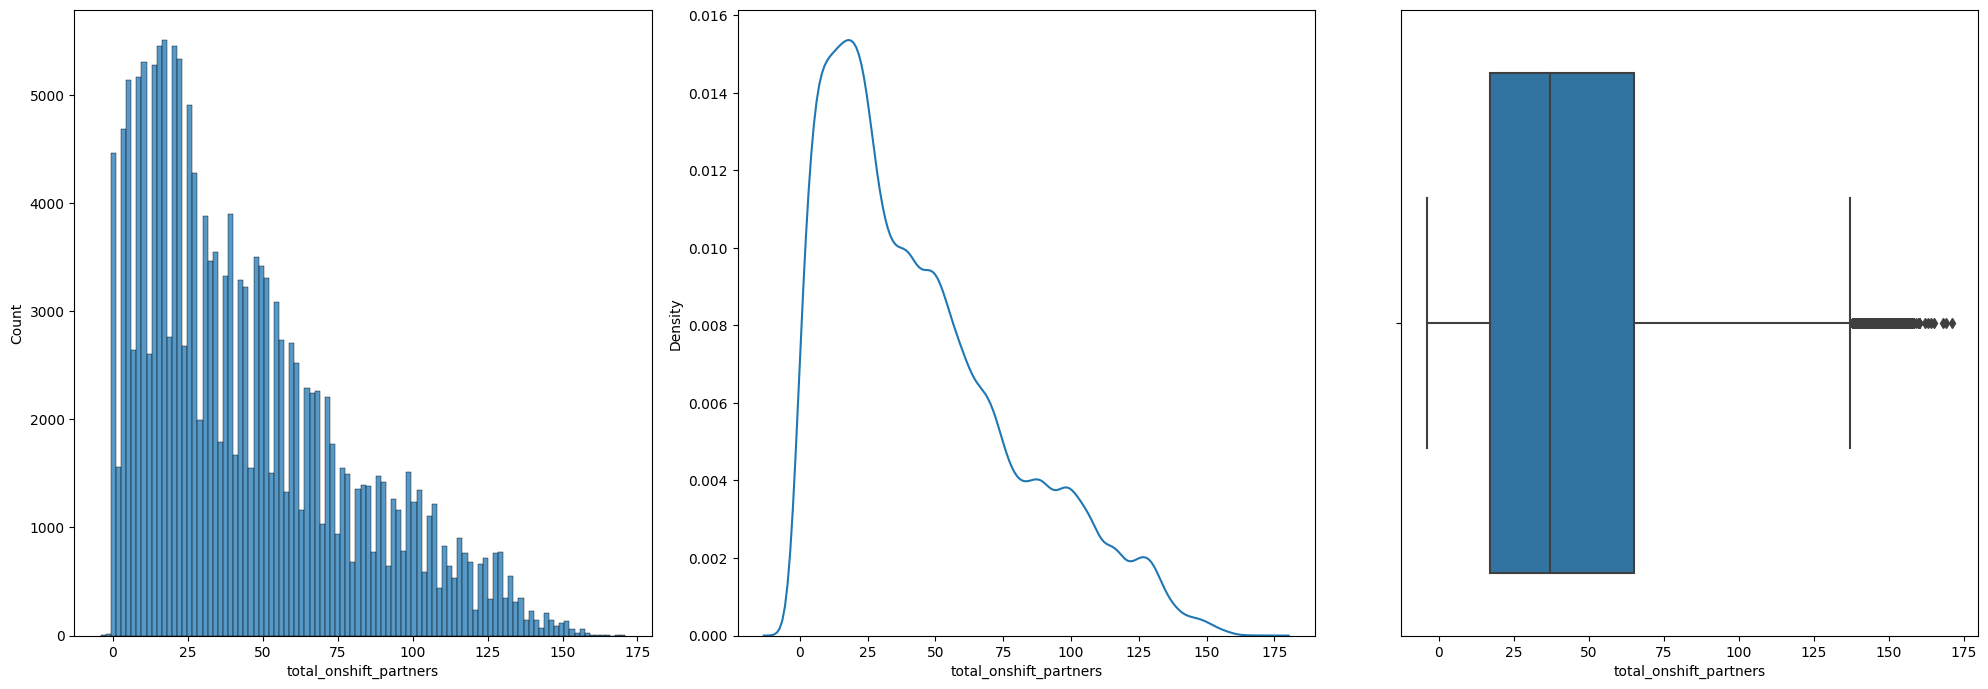

In [ ]:
### total_onshift_partners
hist_kde_box_plot(data, "total_onshift_partners")

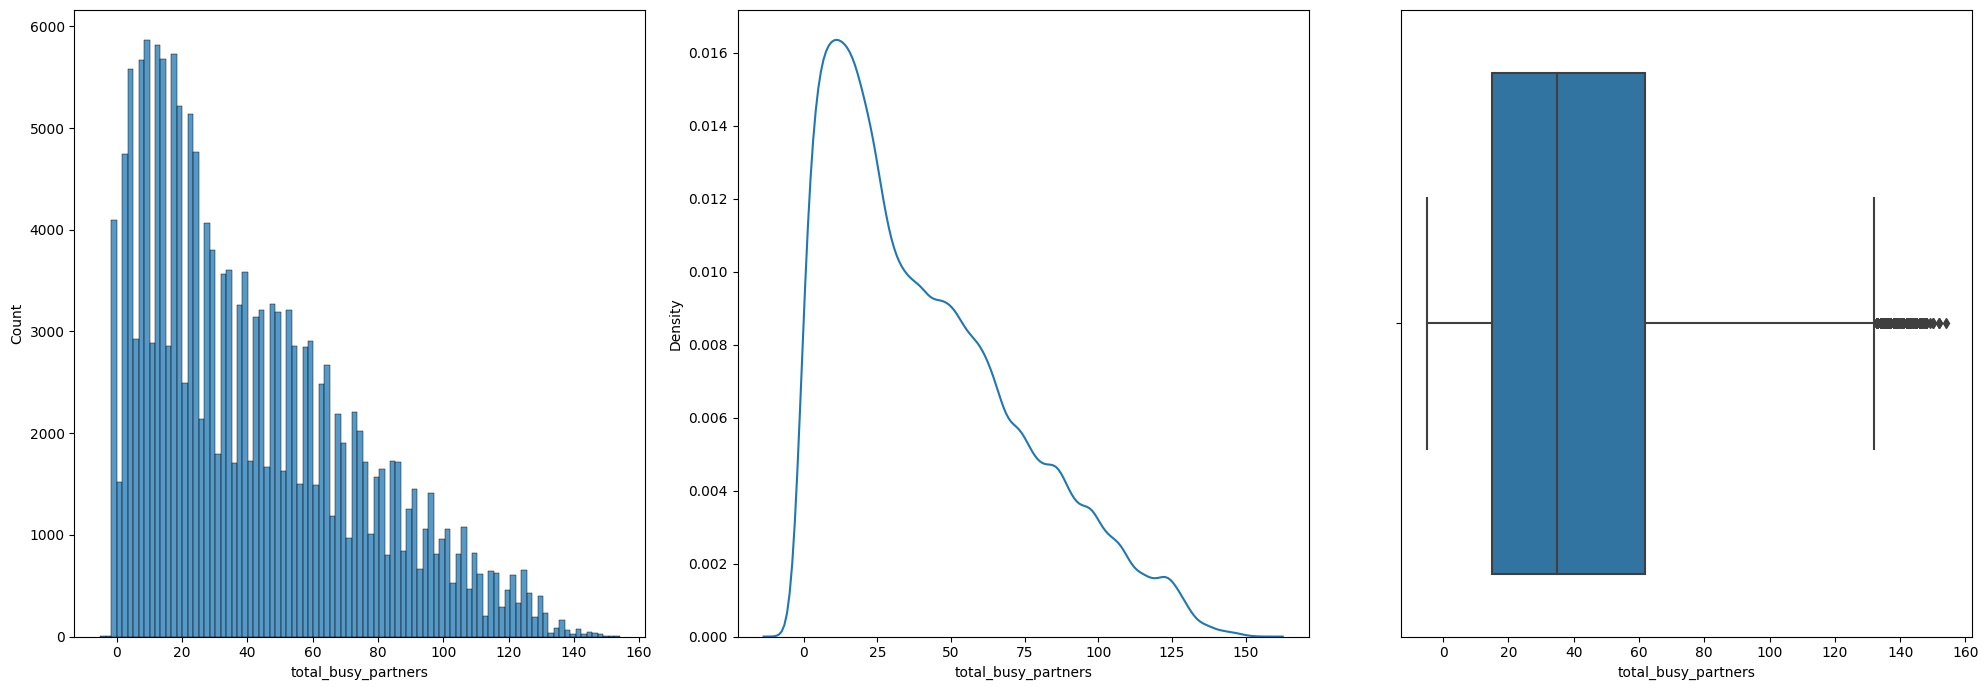

In [ ]:
## total_busy_partners
hist_kde_box_plot(data, "total_busy_partners")

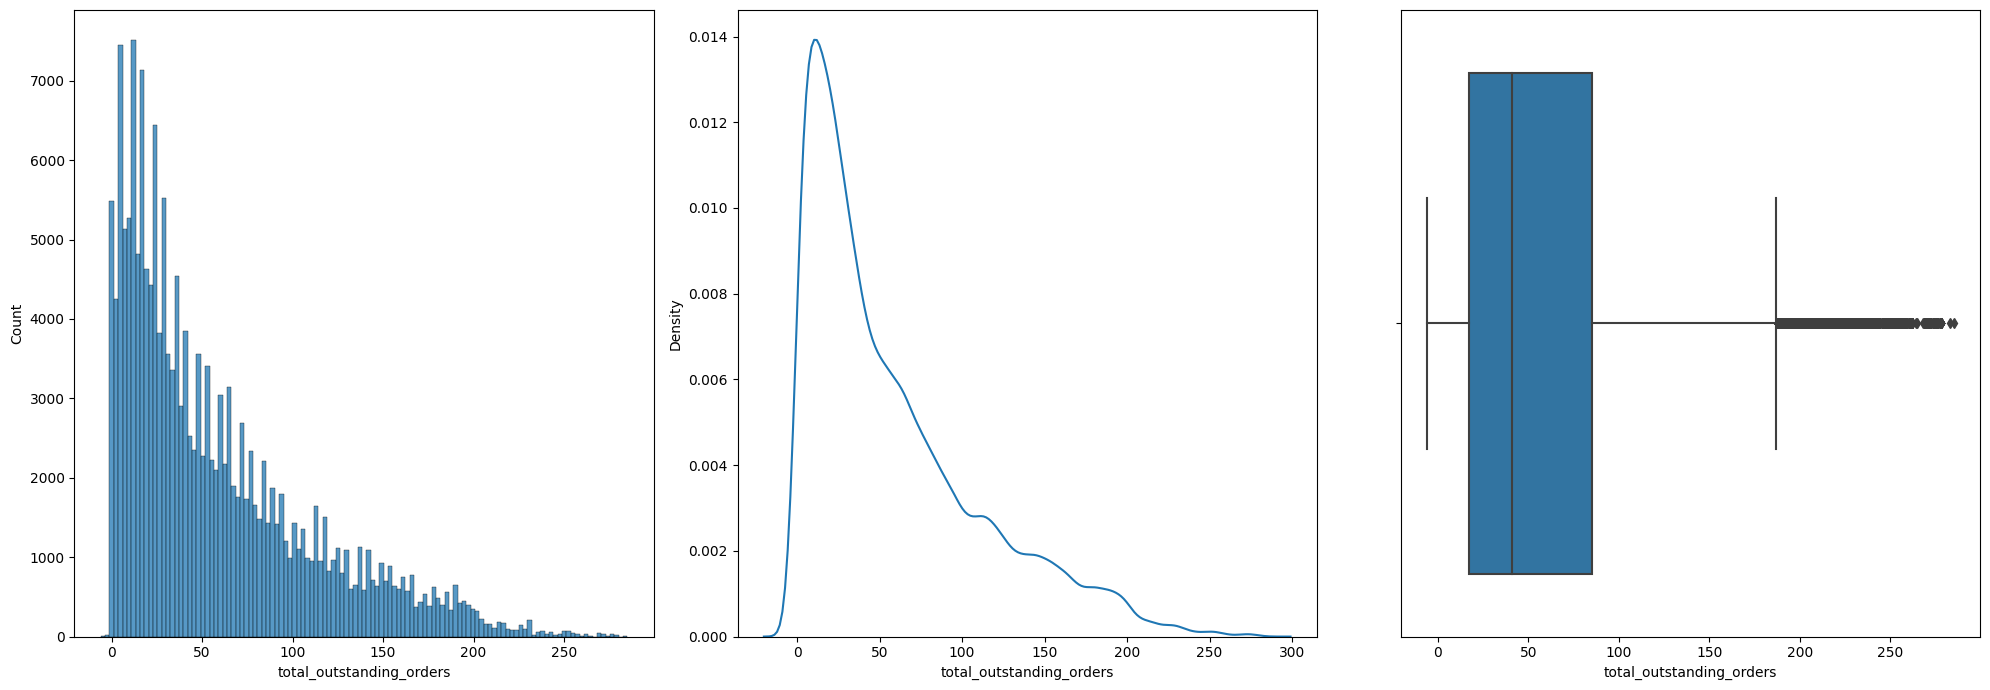

In [ ]:
### total_outstanding_orders
hist_kde_box_plot(data, "total_outstanding_orders")

### Categorical Variables

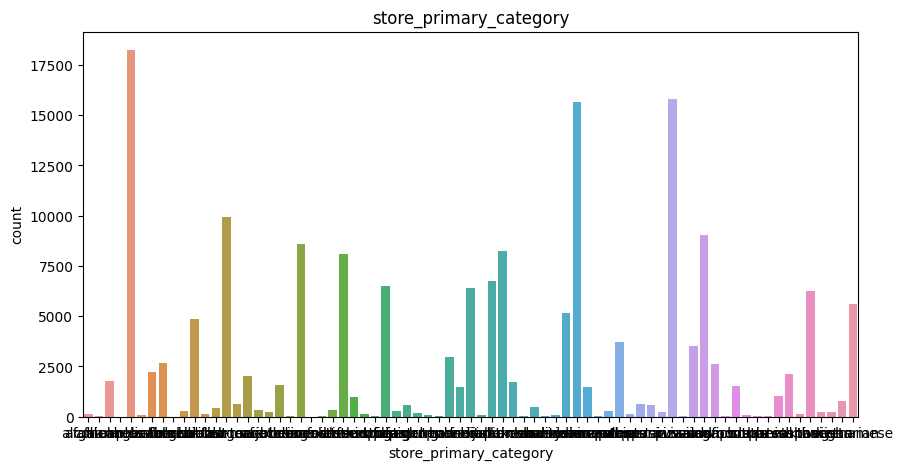

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(data, x= "store_primary_category",ax=ax)
ax.set_title("store_primary_category")
plt.show()

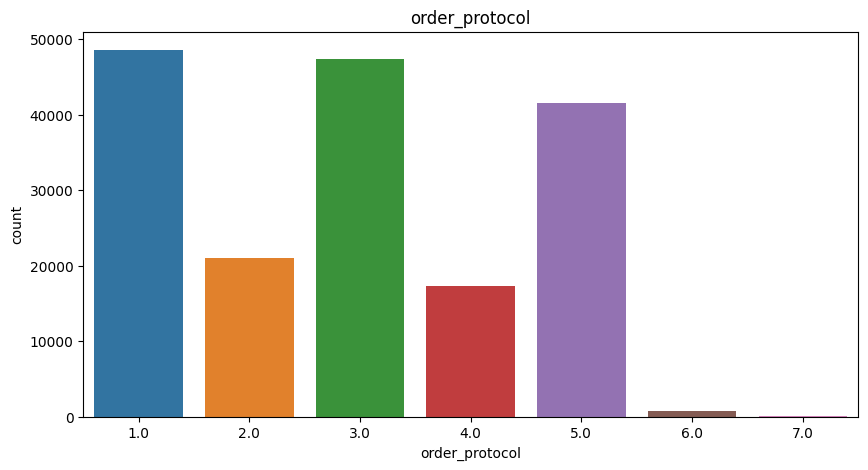

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(data, x= "order_protocol",ax=ax)
ax.set_title("order_protocol")
plt.show()

In [ ]:
# Average number of items per order
print(f"The average number of items per order is {round(data['total_items'].mean(),2)}")

The average number of items per order is 3.2


In [ ]:
print(f"On average people spend {round(data['subtotal'].mean(),2)} per order")

On average people spend 2696.52 per order


## Bivariate Analysis

In [ ]:
store_category_money = data.groupby('store_primary_category')['subtotal'].sum().to_frame().reset_index()
store_category_money = store_category_money.sort_values('subtotal',ascending=False)
store_category_money = store_category_money.head(10)
store_category_money = store_category_money.reset_index(drop=True)
store_category_money

,store_primary_category,subtotal
0,american,48459167
1,pizza,47764944
2,mexican,36313771
3,japanese,28156362
4,italian,25473662
5,chinese,24636514
6,burger,22108624
7,dessert,20073925
8,thai,19664518
9,sandwich,18892262


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.bar(store_category_money,x='subtotal',y='store_primary_category',hover_data=['subtotal', 'store_primary_category'], color='subtotal',text_auto=True)
fig.update_layout(title="Top 10 orders",
                  width=800, height=500, title_x=0.5)
fig.show()

## Multivariate Analysis

<Axes: >

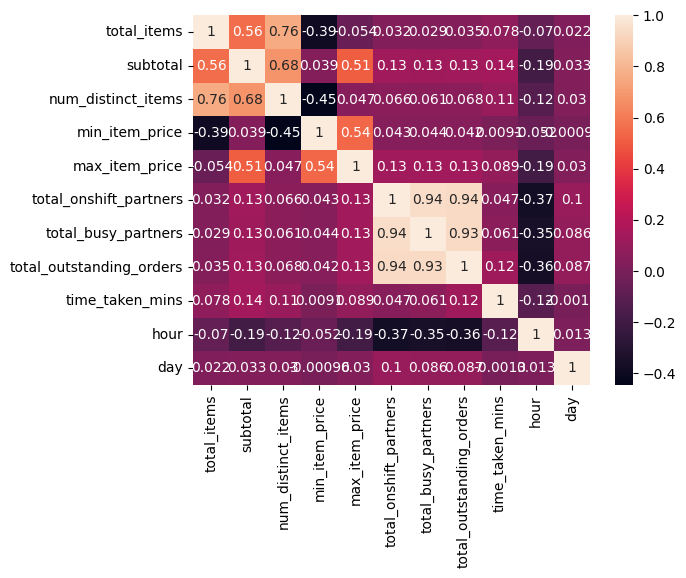

In [ ]:
sns.heatmap(data.corr(), annot=True)

## Encoding categorical column

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  time_taken_mins           176248 non-null  float64
 12  hour                      176248 non-null  int64  
 13  day                       176248 non-null  i

In [31]:
data['store_primary_category'].nunique()

73

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
# Encode the 'store_primary_category' column and add the encoded values as a new column
data['store_primary_encoded'] = OrdinalEncoder().fit_transform(data['store_primary_category'].values.reshape(-1, 1))

# Group by both the original and encoded columns and display a comparison table
comparison_table = data.groupby(['store_primary_category', 'store_primary_encoded']).size()
print(comparison_table)

store_primary_category  store_primary_encoded
afghan                  0.0                        104
african                 1.0                         10
alcohol                 2.0                       1750
alcohol-plus-food       3.0                          1
american                4.0                      18223
                                                 ...  
thai                    68.0                      6246
turkish                 69.0                       220
vegan                   70.0                       232
vegetarian              71.0                       756
vietnamese              72.0                      5582
Length: 73, dtype: int64


In [34]:
# Drop the 'store_primary_category' column
data.drop(['store_primary_category'], axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   order_protocol            176248 non-null  float64
 2   total_items               176248 non-null  int64  
 3   subtotal                  176248 non-null  int64  
 4   num_distinct_items        176248 non-null  int64  
 5   min_item_price            176248 non-null  int64  
 6   max_item_price            176248 non-null  int64  
 7   total_onshift_partners    176248 non-null  float64
 8   total_busy_partners       176248 non-null  float64
 9   total_outstanding_orders  176248 non-null  float64
 10  time_taken_mins           176248 non-null  float64
 11  hour                      176248 non-null  int64  
 12  day                       176248 non-null  int64  
 13  store_primary_encoded     176248 non-null  f

In [36]:
df = data.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   order_protocol            176248 non-null  float64
 2   total_items               176248 non-null  int64  
 3   subtotal                  176248 non-null  int64  
 4   num_distinct_items        176248 non-null  int64  
 5   min_item_price            176248 non-null  int64  
 6   max_item_price            176248 non-null  int64  
 7   total_onshift_partners    176248 non-null  float64
 8   total_busy_partners       176248 non-null  float64
 9   total_outstanding_orders  176248 non-null  float64
 10  time_taken_mins           176248 non-null  float64
 11  hour                      176248 non-null  int64  
 12  day                       176248 non-null  int64  
 13  store_primary_encoded     176248 non-null  f

### Data visualization and cleaning

#### Visualize various columns for better understanding Countplots, scatterplots

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

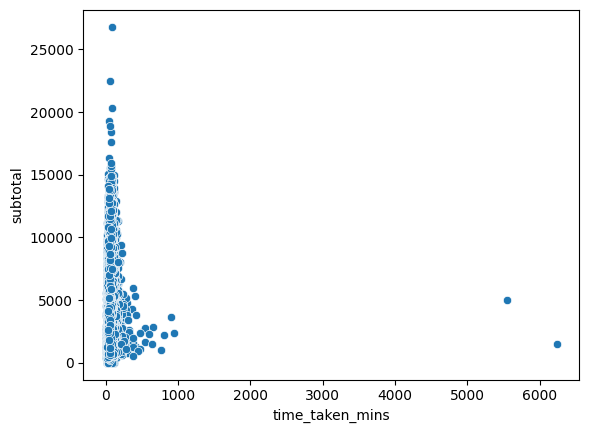

In [38]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

<Axes: xlabel='total_items', ylabel='subtotal'>

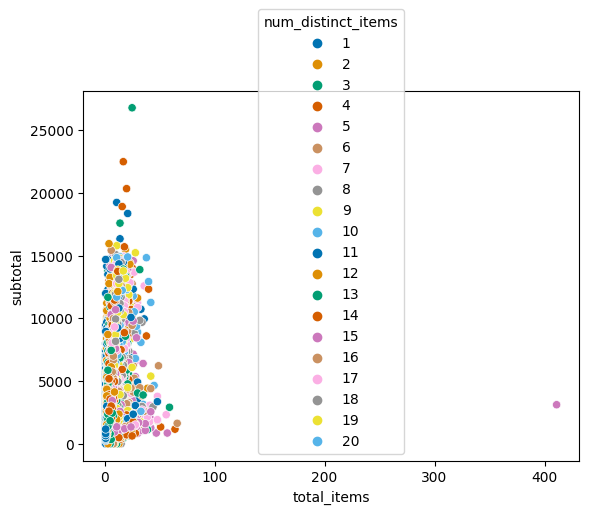

In [39]:
sns.scatterplot(x='total_items',y='subtotal',hue='num_distinct_items',palette='colorblind',data=df)

<Axes: xlabel='day', ylabel='count'>

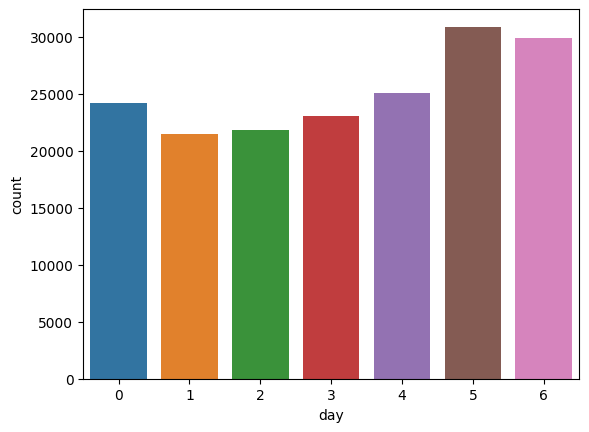

In [40]:
sns.countplot(x=df.day)

<Axes: xlabel='hour', ylabel='count'>

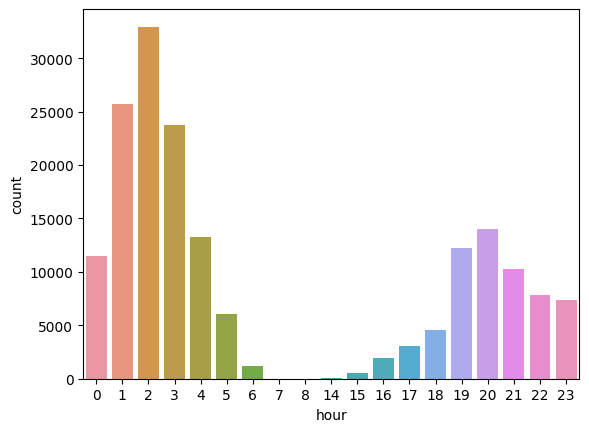

In [41]:
sns.countplot(x = df.hour)

#### Check for outliers

In [42]:
#melt data frame into long format
df_melted = pd.melt(df)

#view first 10 rows of melted data frame
df_melted.head(10)

,variable,value
0,market_id,1.0
1,market_id,2.0
2,market_id,2.0
3,market_id,1.0
4,market_id,1.0
5,market_id,1.0
6,market_id,1.0
7,market_id,1.0
8,market_id,1.0
9,market_id,1.0


In [43]:
sns.set(rc={"figure.figsize":(20, 6)}) #width=3, #height=4

<Axes: xlabel='variable', ylabel='value'>

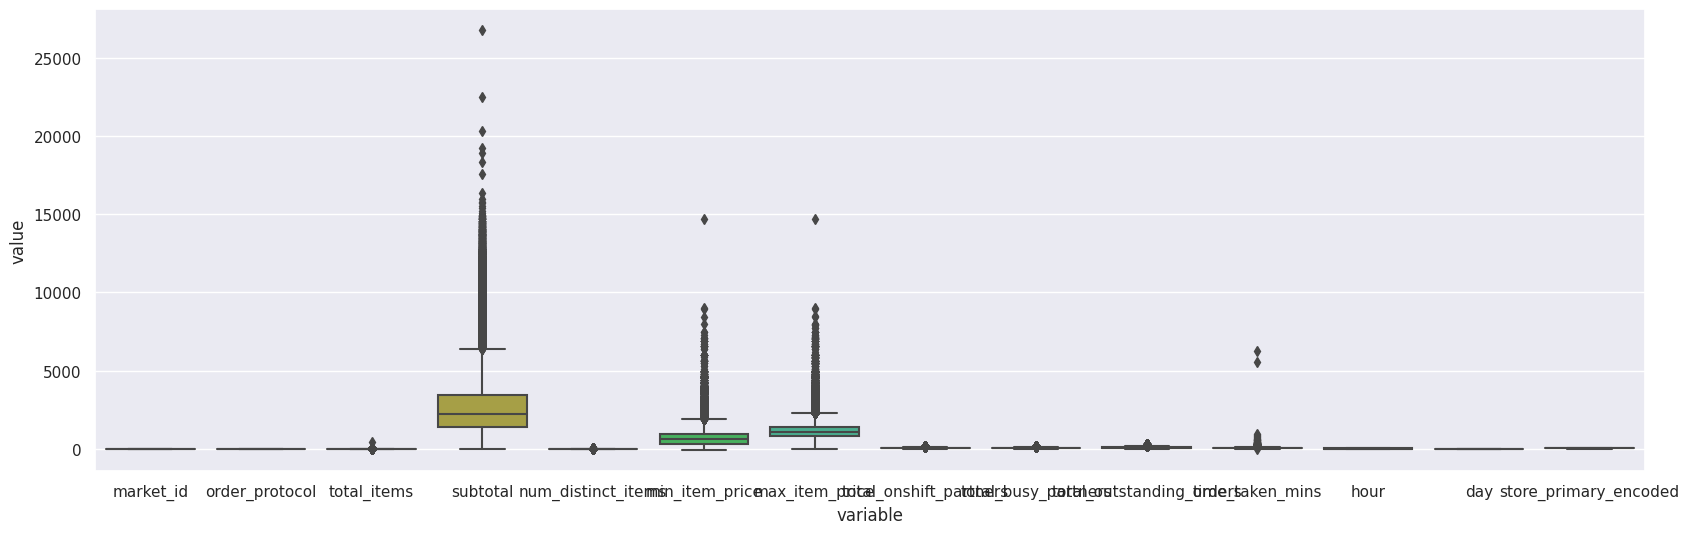

In [44]:
sns.boxplot(x='variable', y='value', data=df_melted)

In [45]:
#data.info()

### Remove outliers

In [46]:
df.skew()

market_id                     0.225531
order_protocol                0.109559
total_items                  23.236782
subtotal                      1.919585
num_distinct_items            1.574148
min_item_price                2.343765
max_item_price                2.207105
total_onshift_partners        0.856872
total_busy_partners           0.778867
total_outstanding_orders      1.191668
time_taken_mins             109.443071
hour                          0.623368
day                          -0.172153
store_primary_encoded        -0.097136
dtype: float64

In [47]:
cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
        'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders','time_taken_mins']


In [48]:
# Calculate the interquartile range (IQR) for each variable
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated IQR
print(IQR)

Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR

total_items                    2.000000
subtotal                    1999.000000
num_distinct_items             2.000000
min_item_price               643.000000
max_item_price               596.000000
total_onshift_partners        48.000000
total_busy_partners           47.000000
total_outstanding_orders      68.000000
time_taken_mins               21.283333
dtype: float64


In [49]:
c0 = (df['total_items'] >= Lower['total_items']) & (df['total_items'] <= Upper['total_items'])
c1 = (df['subtotal'] >= Lower['subtotal']) & (df['subtotal'] <= Upper['subtotal'])
c2 = (df['num_distinct_items'] >= Lower['num_distinct_items']) & (df['num_distinct_items'] <= Upper['num_distinct_items'])
c3 = (df['min_item_price'] >= Lower['min_item_price']) & (df['min_item_price'] <= Upper['min_item_price'])
c4 = (df['max_item_price'] >= Lower['max_item_price']) & (df['max_item_price'] <= Upper['max_item_price'])
c5 = (df['total_onshift_partners'] >= Lower['total_onshift_partners']) & (df['total_onshift_partners'] <= Upper['total_onshift_partners'])
c6 = (df['total_busy_partners'] >= Lower['total_busy_partners']) & (df['total_busy_partners'] <= Upper['total_busy_partners'])
c7 = (df['total_outstanding_orders'] >= Lower['total_outstanding_orders']) & (df['total_outstanding_orders'] <= Upper['total_outstanding_orders'])
c8 = (df['time_taken_mins'] >= Lower['time_taken_mins']) & (df['time_taken_mins'] <= Upper['time_taken_mins'])
# Filter the DataFrame based on the combined boolean conditions
df = df[c0 & c1 & c2 & c3 & c4 & c5 & c6 & c7 & c8]

# Display the updated shape of the DataFrame
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (169343, 14)


In [50]:
df[cols].skew()

total_items                 1.232208
subtotal                    1.322700
num_distinct_items          1.095262
min_item_price              1.104295
max_item_price              0.883262
total_onshift_partners      0.856747
total_busy_partners         0.777751
total_outstanding_orders    1.191645
time_taken_mins             0.993148
dtype: float64

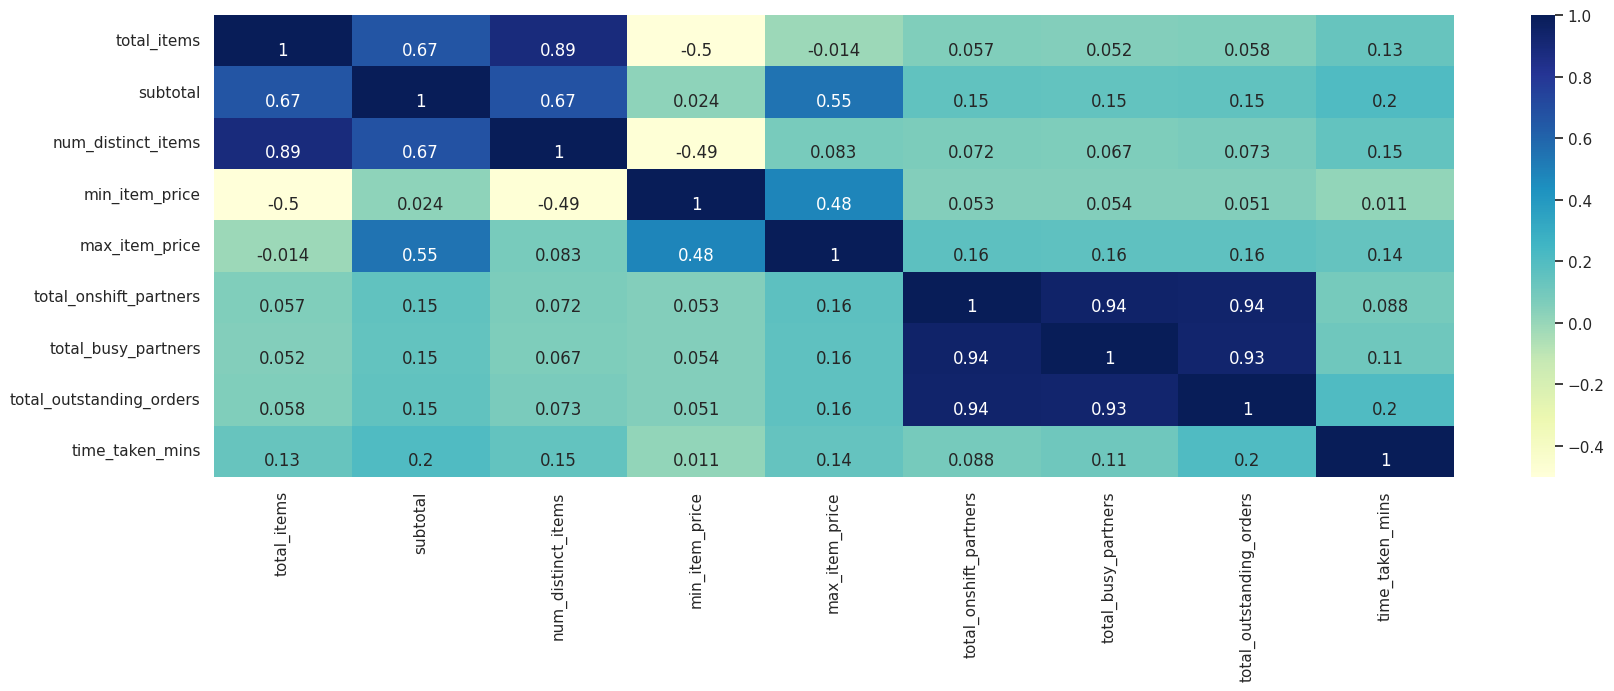

In [51]:
# Calculate the correlation matrix between the interval variables
corr = df[cols].corr()

# Define annotation keyword arguments for heatmap
annot_kws = {"ha": 'center', "va": 'top'}

# Create a heatmap with annotations
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu")

# Display the plot
plt.show()

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

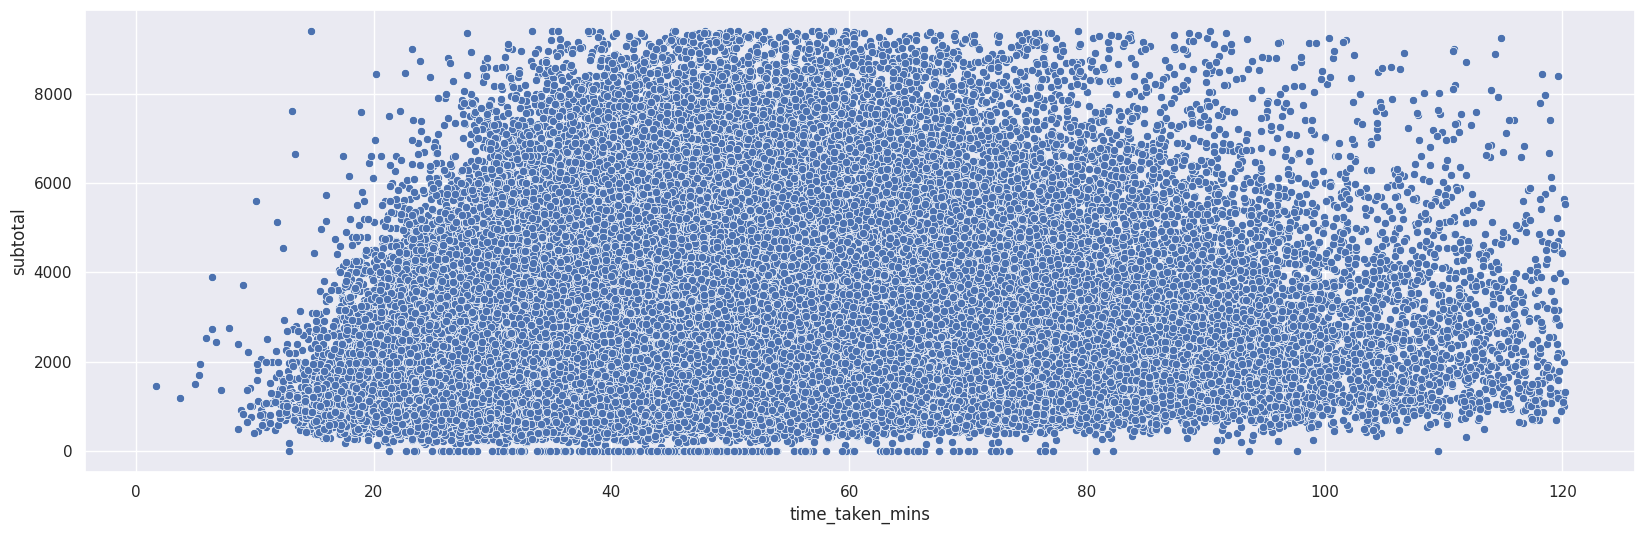

In [52]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

### Data splitting

In [53]:
y=data['time_taken_mins']
x=data.drop(['time_taken_mins'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day,store_primary_encoded
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4,4.0
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1,46.0
8,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,0,0,36.0
14,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,3,3,38.0
15,1.0,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,2,1,38.0


In [55]:
X_train.shape

(140998, 13)

In [56]:
X_test.shape

(35250, 13)

### Model building using Linear Regression

In [57]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(x)

In [58]:
#Performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=0)

In [59]:
X_train.shape

(123373, 13)

In [60]:
y_train.shape

(123373,)

In [61]:
#model building using Multiple regression
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred=mlr.predict(X_test)
y_pred

array([47.77492585, 56.1002233 , 50.49335318, ..., 41.35062689,
       30.40032867, 38.97159711])

In [63]:
y_test.values

array([55.48333333, 80.71666667, 41.21666667, ..., 47.25      ,
       22.03333333, 32.1       ])

In [64]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
Result

,Actual Values,Predicted Values
44145,55.483333,47.774926
3619,80.716667,56.100223
111976,41.216667,50.493353
159995,35.083333,45.817205
15316,44.916667,46.132051
...,...,...
115673,45.750000,41.616214
116104,41.683333,38.112108
170772,47.250000,41.350627
149551,22.033333,30.400329


In [65]:
#model validation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 12.28753655837435
mean squared error: 852.1728479389292
root mean squared error: 29.191999724906296
r2-score: 0.06902534146373906


In [73]:
x.mean()

market_id                      2.743747
order_protocol                 2.911687
total_items                    3.204592
subtotal                    2696.498939
num_distinct_items             2.674589
min_item_price               684.937730
max_item_price              1159.886994
total_onshift_partners        44.905276
total_busy_partners           41.845434
total_outstanding_orders      58.206800
hour                           8.493872
day                            3.221563
store_primary_encoded         35.891482
dtype: float64

In [74]:
#prediction using mlr
import warnings
warnings.filterwarnings('ignore')
y_new=mlr.predict(ms.transform([[2,2,3,2696,2,684,1159,44,41,58,8,3,35]]))
y_new

array([49.1089807])

Here we can see after prediction of new values using multiple linear regression, we are getting approximate delivery time as 5 minutes.

### Model building with Random Forest

In [75]:
# more time to execute
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [78]:
y_pred=regressor.predict(X_test)
y_pred

array([65.988     , 58.807     , 52.6195    , ..., 45.52766667,
       33.70466667, 36.16766667])

In [79]:
y_test.values

array([55.48333333, 80.71666667, 41.21666667, ..., 47.25      ,
       22.03333333, 32.1       ])

In [80]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
Result

,Actual Values,Predicted Values
44145,55.483333,65.988000
3619,80.716667,58.807000
111976,41.216667,52.619500
159995,35.083333,45.827000
15316,44.916667,39.889667
...,...,...
115673,45.750000,39.206333
116104,41.683333,33.483667
170772,47.250000,45.527667
149551,22.033333,33.704667


In [81]:
#model validation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
print("mean absolute error/mae:",mean_absolute_error(y_test,y_pred))
print("mean squared error/mse:",mean_squared_error(y_test,y_pred))
print("root mean squared error/rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error/mae: 11.737995688926416
mean squared error/mse: 853.2790099927197
root mean squared error/rmse: 29.210939902589914
r2-score: 0.06781689080398834


## Model buidling with Neural networks

In [85]:
!pip install tensorflow

In [86]:
!pip install keras

In [87]:
!pip install theano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=490eb4912822bb7744846c80df023a74450613b501ca65c4315ddfa86ee4ffb6
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built theano


In [88]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model

In [57]:
from tensorflow.keras import Sequential

In [59]:
from tensorflow.keras.optimizers import Adam

### Data Scaling and Splitting

In [89]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

We will build a simple neural network to train our regression model it is a sequential model with three layers,

we have kept the number of nodes in the first layers equal to the number of input columns, and for the subsequent layers 512,1024,256, which can we changed or experimented with

the activation for the layers is kept as relu because it is a great non linear activation function that works for most cases, we could have used leaky relu if we see gradient vanishing.

the last layer has one node because it will give the single result that is our delivery time and the activation function for that should be linear

In [ ]:
# import os

# # Create a function to implement a ModelCheckpoint callback with a specific filename
# def create_model_checkpoint(model_name, save_path="model_experiments"):
#   return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model


In [90]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
def create_baseline():

  model = Sequential([
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1 , activation = 'sigmoid')])
  return model

In [92]:
model = create_baseline()

In [93]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

### Loading Tensorboard

In [ ]:
# %load_ext tensorboard

# from datetime import datetime
# now = datetime.now()
# log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

In [ ]:
# !rm -rf logs

In [ ]:
# from tensorflow.keras.callbacks import TensorBoard

# tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

#### Training the model with epoch=10 and batch size = 128

In [101]:
# history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128, verbose=0,callbacks=[tb_callback])

#### Lets check the Model performance on Training and Validation data

In [102]:
# model.evaluate(X_train, y_train)

In [103]:
# model.evaluate(X_val, y_val)

#### Trying different combinations and hyperparameters

In [95]:
model=Sequential()
model.add(Dense(14,kernel_initializer='normal',activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))

we use adam optimizer which is extention to classic schostic gradient descent(SGD) algorithm, but handles much of its drawbacks

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

In [96]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=30,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/30
221/221 [==============================] - 16s 67ms/step - loss: 990.7935 - mse: 990.7935 - mae: 13.6089 - val_loss: 328.5843 - val_mse: 328.5843 - val_mae: 12.2597
Epoch 2/30
221/221 [==============================] - 14s 64ms/step - loss: 939.4848 - mse: 939.4848 - mae: 12.6233 - val_loss: 351.1217 - val_mse: 351.1217 - val_mae: 14.5446
Epoch 3/30
221/221 [==============================] - 15s 66ms/step - loss: 930.9046 - mse: 930.9046 - mae: 12.4243 - val_loss: 289.5656 - val_mse: 289.5656 - val_mae: 11.9102
Epoch 4/30
221/221 [==============================] - 14s 63ms/step - loss: 930.6207 - mse: 930.6207 - mae: 12.4308 - val_loss: 292.5445 - val_mse: 292.5445 - val_mae: 12.1495
Epoch 5/30
221/221 [==============================] - 14s 65ms/step - loss: 924.2117 - mse: 924.2117 - mae: 12.2928 - val_loss: 290.6066 - val_mse: 290.6066 - val_mae: 12.1214
Epoch 6/30
221/221 [==============================] - 14s 64ms/step - loss: 922.4810 - mse: 922.4810 - mae: 12.2574 - va

we plot train and validation loss throughout training

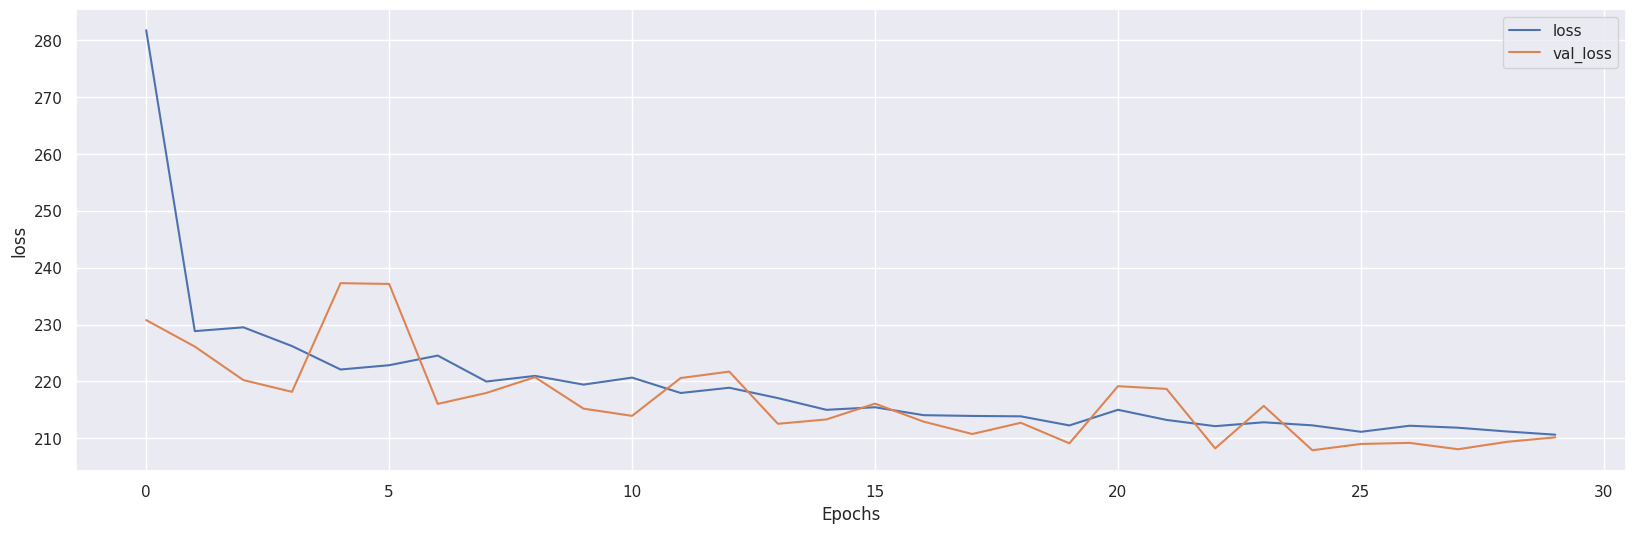

In [61]:
# def plot_history(history,key):
#     plt.plot(history.history[key])
#     plt.plot(history.history['val_'+key])
#     plt.xlabel("Epochs")
#     plt.ylabel(key)
#     plt.legend([key,'val_'+key])
#     plt.show()
# #plot the history
# plot_history(history,'loss')

In [97]:
z= model.predict(X_test)

1102/1102 [==============================] - 3s 3ms/step


In [98]:
mse = mean_squared_error(y_test, z)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, z)
print("mae : ",mae)

mse :  296.60157996783903
rmse :  17.222124722804647
errors for neural net
mae :  11.828012682340725


In [100]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, z)

0.27025691527729906

In [104]:
print("r2-score:",r2_score(y_test,z))

r2-score: 0.2023462989057826


By comparing the results of our neural network model with the linear regression,random forest models we can see that without any tuning or creating pretty complex architectures for training our NN model we have achieved high accuracy

In [106]:
y_new=model.predict(ms.transform([[2,2,3,2696,2,684,1159,44,41,58,8,3,35]]))

1/1 [==============================] - 0s 106ms/step


In [107]:
y_new

array([[43.20615]], dtype=float32)

Here we can see after prediction of new values using multiple linear regression, we are getting approximate delivery time as 5 minutes whereas in terms of Neural network it is approcimately 4 minutes